In [1]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import numpy as np

In [2]:
import sys
sys.path.append('../programming_scripts/')

from MS2LDA_core import run_lda
from MS2LDA_core import predict_with_lda

from SMART_annotation import annotate_motifs

C:\Users\dietr004\AppData\Local\anaconda3\envs\spec2toxReadAcross\lib\site-packages\sparsestack\StackedSparseArray.py:4: DeprecationWarning: Please use `get_index_dtype` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import get_index_dtype


In [3]:
spectra_path = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-COLLECTIONS-PESTICIDES-POSITIVE.mgf"

In [96]:
lda_model, corpus, id2word = run_lda(spectra_path=spectra_path, num_motifs=89)

In [97]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.244952 -0.006227       1        1  3.144999
80    -0.223384  0.117249       2        1  2.682309
82     0.037686  0.159897       3        1  2.385709
45     0.037830  0.220607       4        1  2.158192
34    -0.032932 -0.129324       5        1  2.139292
...         ...       ...     ...      ...       ...
52     0.055936 -0.195206      85        1  0.524320
8     -0.028905 -0.068599      86        1  0.473105
76    -0.090927  0.074952      87        1  0.433236
12     0.094287  0.093753      88        1  0.363893
63     0.055429 -0.025254      89        1  0.341343

[89 rows x 5 columns], topic_info=         Term         Freq        Total Category  logprob  loglift
3944   70.04+  3820.000000  3820.000000  Default  30.0000  30.0000
61     72.04+  2758.000000  2758.000000  Default  29.0000  29.0000
2599  158.98+  2043.000000  2043.000000  Default  28.0000  28.0000
141   127.02+  1424.000000  1424.000000  Default  27.0000  27.0000
140   126.01+  1188.000000  1188.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1246   312.08     5.606995    33.284776  Topic89  -5.3079   3.8990
3680  302.07+     7.967605   278.999359  Topic89  -4.9565   2.1242
1640  125.08+     6.363111    97.457752  Topic89  -5.1814   2.9511
229    116.12     5.743994    46.522787  Topic89  -5.2838   3.5882
6675   215.12     5.802138   123.287187  Topic89  -5.2737   2.6237

[4911 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4318      3  0.896556    0.03
4318     14  0.059770    0.03
4318     20  0.011954    0.03
4318     22  0.011954    0.03
1953      3  0.225277    0.04
...     ...       ...     ...
1672     77  0.013802  99.09+
1672     84  0.003450  99.09+
1672     85  0.079360  99.09+
1116     74  0.695811   99.11
1632     46  0.650978   99.15

[17106 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 81, 83, 46, 35, 17, 47, 49, 88, 58, 78, 32, 65, 11, 28, 63, 79, 60, 29, 52, 4, 68, 89, 6, 15, 41, 56, 43, 76, 26, 85, 74, 84, 5, 16, 61, 66, 50, 1, 69, 21, 30, 10, 37, 75, 80, 3, 20, 33, 40, 38, 34, 44, 51, 14, 19, 23, 45, 48, 70, 72, 22, 12, 86, 55, 42, 82, 71, 62, 31, 36, 67, 87, 18, 73, 54, 24, 27, 59, 57, 8, 7, 25, 39, 53, 9, 77, 13, 64])

In [98]:
smiles_per_motifs, predicted_motifs = predict_with_lda(lda_model, spectra_path, id2word)

In [99]:
annotated_motifs = []
purities_maccs = []
for smiles_per_motif in smiles_per_motifs:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs.append(annotated_motif)
    purities_maccs.append(purity_maccs)

In [100]:
for motif_number, purity_maccs in enumerate(purities_maccs):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs[motif_number]),len(annotated_motifs[motif_number]), np.nanmean(purity_maccs_nan))

0 5 5 0.45142857142857135
1 2 30 0.65
2 4 7 0.5085227272727273
3 6 24 0.5128205128205129
4 4 10 0.5798969072164949
5 4 13 0.5416666666666666
6 6 13 0.45333333333333337
7 2 47 0.8405797101449275
8 3 12 0.5341880341880342
9 6 15 0.47222222222222215
10 4 18 0.5595238095238095
11 4 8 0.5445205479452054
12 3 27 1.0
13 4 7 0.5034722222222222
14 8 11 0.4154040404040404
15 7 13 0.38714285714285707
16 8 6 0.45153061224489793
17 7 15 0.5034843205574913
18 5 6 0.42823529411764705
19 8 8 0.36704545454545456
20 7 11 0.3700680272108844
21 5 6 0.4666666666666667
22 2 17 0.6307692307692307
23 7 10 0.40062111801242234
24 8 7 0.4764705882352941
25 7 4 0.3997113997113997
26 7 17 0.5097001763668431
27 7 33 0.5229357798165137
28 9 13 0.4260869565217391
29 8 13 0.5022935779816514
30 5 3 0.43653846153846143
31 8 8 0.41707920792079206
32 4 6 0.48579545454545453
33 7 4 0.38002773925104016
34 14 15 0.3598382749326146
35 5 7 0.5435897435897437
36 7 9 0.3682539682539682
37 5 9 0.44329896907216493
38 8 15 0.462765

In [101]:
from rdkit.Chem import Draw
from rdkit import Chem

### Known Dataset

In [144]:
motif_number = 62

In [145]:
len(annotated_motifs[motif_number])

9

In [146]:
annotated_motifs[motif_number]

['[!C;!c;R]',
 '*!:*:*!:*',
 '*!@*@*!@*',
 '*!@[CH2]!@*',
 '[#6]-[#8]',
 'a',
 '*1~*~*~*~*~*~1',
 '[#8]',
 '[R]']

In [147]:
len(smiles_per_motifs[motif_number])

14

In [148]:
smiles_per_motifs[motif_number]

['C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC(=C(C=C2Cl)OC(C(C(F)(F)F)F)(F)F)Cl)F',
 'C1C(COC1(CN2C=NC=N2)C3=C(C=C(C=C3)Cl)Cl)Br',
 'C1=CC(=C(C=C1Cl)Cl)C(CN2C=NC=N2)COC(C(F)F)(F)F',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CCCCC1=C(N=C(N=C1OS(=O)(=O)N(C)C)NCC)C',
 'CC(C)(C)C(C(CC1=CC=C(C=C1)Cl)N2C=NC=N2)O',
 'C1C(COC1(CN2C=NC=N2)C3=C(C=C(C=C3)Cl)Cl)Br',
 'C1=CC(=C(C=C1Cl)Cl)C(CN2C=NC=N2)COC(C(F)F)(F)F',
 'C1=CC=C(C(=C1)C2C(O2)(CN3C=NC=N3)C4=CC=C(C=C4)F)Cl',
 'CCCC(CN1C=NC=N1)C2=C(C=C(C=C2)Cl)Cl',
 'CN(C(=O)NC1=CC=C(C=C1)Cl)OC',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CC1=CC(=C(C(=C1)C)C2=C(C3(CCCC3)OC2=O)OC(=O)CC(C)(C)C)C',
 'CCCC(CN1C=NC=N1)C2=C(C=C(C=C2)Cl)Cl']

In [149]:
mol_per_motif = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs[motif_number]]

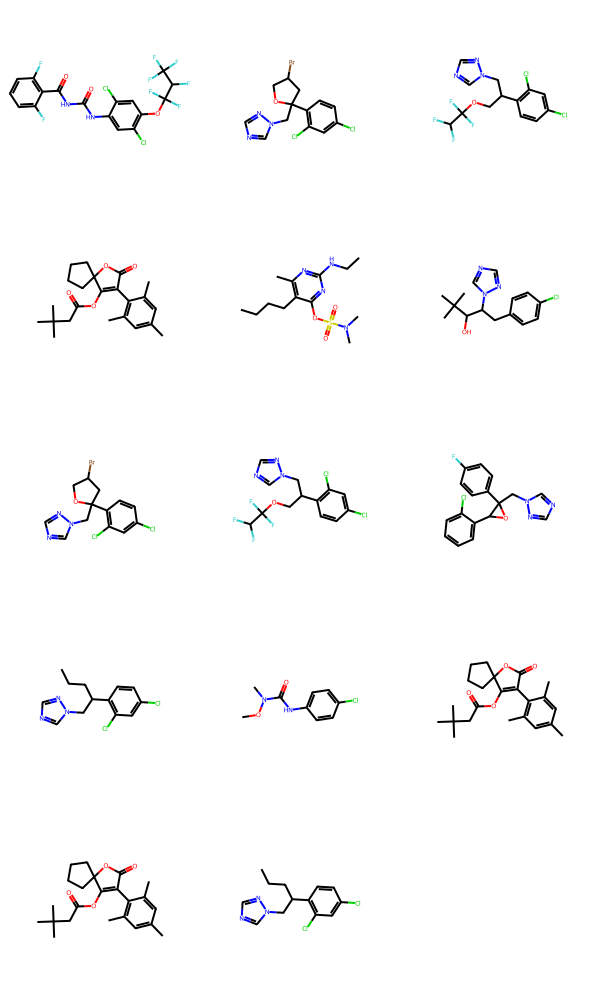

In [150]:
Draw.MolsToGridImage(mol_per_motif)

### to compare clusters you could use the tanimoto similarity for a binary motif fingerprint (not implemented yet) against another binary motif fingerprint

---

### Unknown Dataset

In [37]:
#spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-NIH-SMALLMOLECULEPHARMACOLOGICALLYACTIVE.mgf"
spectra_path_diffDB = r"C:\Users\dietr004\Documents\PhD\computational mass spectrometry\Spec2Struc\Project_SubformulaAnnotation\raw_data\_RAWdata1\GNPS-SCIEX-LIBRARY.mgf"

In [38]:
smiles_per_motifs_diffDB, predicted_motifs_diffDB = predict_with_lda(lda_model, spectra_path_diffDB, id2word)

In [39]:
annotated_motifs_diffDB = []
purities_maccs_diffDB = []
for smiles_per_motif in smiles_per_motifs_diffDB:
    annotated_motif, purity_maccs = annotate_motifs(smiles_per_motif)
    annotated_motifs_diffDB.append(annotated_motif)
    purities_maccs_diffDB.append(purity_maccs)

In [40]:
for motif_number, purity_maccs in enumerate(purities_maccs_diffDB):
    purity_maccs_nan = purity_maccs.copy()
    purity_maccs_nan[purity_maccs_nan == 0] = np.nan
    print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))

0 0 0 nan
1 0 0 nan
2 0 0 nan
3 0 0 nan
4 0 0 nan
5 0 0 nan
6 0 0 nan
7 0 0 nan
8 0 0 nan
9 0 0 nan
10 0 0 nan
11 0 0 nan
12 0 0 nan
13 1 24 1.0
14 0 0 nan
15 1 35 1.0
16 0 0 nan
17 0 0 nan
18 0 0 nan
19 0 0 nan
20 0 0 nan
21 1 41 1.0
22 0 0 nan
23 0 0 nan
24 1 43 1.0
25 0 0 nan
26 1 41 1.0
27 0 0 nan
28 2 23 0.6619718309859155
29 1 78 1.0
30 2 24 0.7790697674418605
31 1 38 1.0
32 0 0 nan
33 1 33 1.0
34 5 13 0.49855072463768113
35 0 0 nan
36 2 20 0.6666666666666666
37 1 70 1.0
38 1 61 1.0
39 2 29 0.7416666666666667
40 1 39 1.0
41 1 59 1.0
42 5 3 0.4066666666666668
43 6 19 0.4793814432989692
44 2 24 0.6578947368421053
45 5 1 0.5220779220779221
46 3 0 0.4157706093189964
47 4 14 0.5194174757281553
48 6 14 0.4501718213058418
49 4 9 0.47023809523809523
50 5 14 0.5121951219512195
51 6 12 0.4158878504672896
52 4 2 0.4269230769230769
53 6 20 0.4814814814814815
54 12 12 0.3726851851851852
55 12 10 0.3573446327683615
56 3 21 0.6145833333333331
57 23 7 0.3722826086956521
58 9 5 0.3493589743589743

C:\Users\dietr004\AppData\Local\Temp\ipykernel_16936\3576634217.py:4: RuntimeWarning: Mean of empty slice
  print(motif_number, len(smiles_per_motifs_diffDB[motif_number]),len(annotated_motifs_diffDB[motif_number]), np.nanmean(purity_maccs_nan))


In [41]:
motif_number = 45

In [42]:
len(annotated_motifs_diffDB[motif_number])

1

In [43]:
annotated_motifs_diffDB[motif_number]

['[#8]']

In [44]:
smiles_per_motifs_diffDB[motif_number]

['CCCCCCCC\\C=C/CCCCCCCC(O)=O',
 'CCCCCCCCCCCCCC(O)=O',
 'c1cc2c(cc1F)c(=O)n(c(n2)n3cncn3)c4ccc(cc4Cl)Cl',
 'CC(C)[C@H]1CC[C@H]([C@@]1(Cn2cncn2)O)Cc3ccc(cc3)Cl',
 'CC1(CCC(C1(Cn2cncn2)O)Cc3ccc(cc3)Cl)C']

In [45]:
mol_per_motif_diffDB = [Chem.MolFromSmiles(smiles) for smiles in smiles_per_motifs_diffDB[motif_number]]

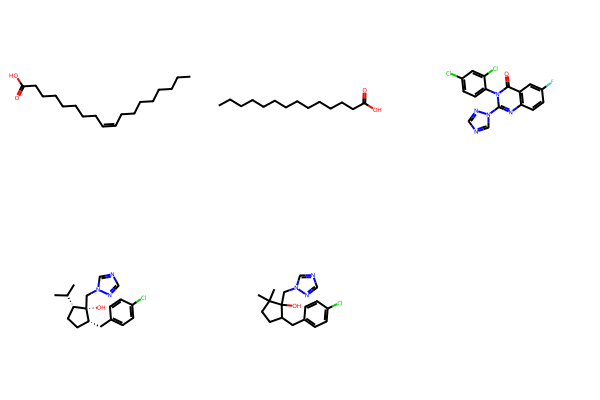

In [63]:
Draw.MolsToGridImage(mol_per_motif_diffDB)

In [64]:
smarts_mol = [Chem.MolFromSmarts(smarts) for smarts in annotated_motifs_diffDB[motif_number]]

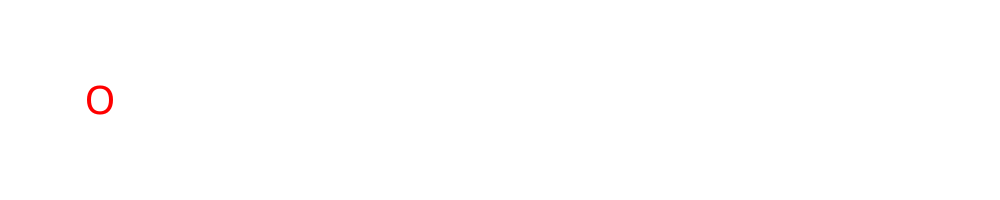

In [67]:
Draw.MolsToGridImage(smarts_mol[:5], molsPerRow=5)

In [29]:
Draw.MolsToGridImage(smarts_mol[9:], molsPerRow=5)

[14:52:27] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file C:\rdkit\build\temp.win-amd64-cpython-39\Release\rdkit\Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code\GraphMol\MolDraw2D\MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.09.4
	BOOST: 1_78
